# CS460
## Destiny Tudara
### Adapting the Burrows-Wheeler Transform (BWT) for Personalized DNA Analysis


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Step 1: Read the 23andMe raw data
def read_23andme(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_lines = [line.strip() for line in lines if not line.startswith('#')]
    data = [line.split('\t') for line in data_lines]
    df = pd.DataFrame(data, columns=['rsid', 'chromosome', 'position', 'genotype'])
    return df

# Step 2: Function to concatenate rsid and genotype to form the encoded string
def encode_genetic_data(df):
    genetic_string = ''.join(df['rsid'] + df['genotype'])
    return genetic_string

# Step 3: Function to perform BWT
def bwt_transform(s):
    s = s + "$"  # Add end of string marker
    n = len(s)
    table = sorted(s[i:] + s[:i] for i in range(n))  # Table of rotations
    return "".join(row[-1] for row in table)  # Last column of the table

# Step 4: Function to perform inverse BWT
def inverse_bwt(r):
    n = len(r)
    table = [""] * n  # Initialize table of n empty strings
    for _ in range(n):
        table = sorted(r[i] + table[i] for i in range(n))  # Prepend r to each string and sort
    s = [row for row in table if row.endswith("$")][0]  # Find the correct row
    return s.rstrip("$")  # Remove end of string marker

# Main process
file_path = 'rawdata.txt'  # Ensure this file is in the current directory

# Check if the file exists
if os.path.exists(file_path):
    print("File found. Reading the file...")
    df = read_23andme(file_path)
    print("First 5 rows of the genetic data:\n", df.head())
    
    # Step 2: Encode the genetic data
    genetic_string = encode_genetic_data(df)
    print("Encoded Genetic String (first 100 chars):", genetic_string[:100])
    
    # Step 3: Apply BWT to the genetic string
    bwt_result = bwt_transform(genetic_string)
    print("BWT Result (first 100 chars):", bwt_result[:100])  # Print first 100 characters of the BWT result for brevity
    
    # Step 4: Perform inverse BWT to validate
    inverse_result = inverse_bwt(bwt_result)
    print("Inverse BWT Result (first 100 chars):", inverse_result[:100])  # Print first 100 characters to check correctness

else:
    print(f"File not found: {file_path}")



File found. Reading the file...
First 5 rows of the genetic data:
           rsid chromosome position genotype
0  rs548049170          1    69869       TT
1    rs9283150          1   565508       AA
2  rs116587930          1   727841       GG
3    rs3131972          1   752721       GG
4   rs12184325          1   754105       CC
Encoded Genetic String (first 100 chars): rs548049170TTrs9283150AArs116587930GGrs3131972GGrs12184325CCrs12567639AArs114525117GGrs12124819AGrs1


In [1]:
import pandas as pd
import os

def read_23andme(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_lines = [line.strip() for line in lines if not line.startswith('#')]
    data = [line.split('\t') for line in data_lines]
    df = pd.DataFrame(data, columns=['rsid', 'chromosome', 'position', 'genotype'])
    return df

# Example usage
file_path = 'rawdata.txt'  # Ensure this file is in the current directory

# Check if the file exists
if os.path.exists(file_path):
    df = read_23andme(file_path)
    print(df.head())
else:
    print(f"File not found: {file_path}")

# List of SNPs associated with AMD
amd_snps = {
    'rs1061170': 'C',  # CFH
    'rs3753394': 'A',  # CFH
    'rs10490924': 'T',  # ARMS2
    'rs2230199': 'G',  # C3
    'rs9332739': 'C',  # C2
    'rs641153': 'A'  # CFB
}

# Filter the DataFrame to include only relevant SNPs
amd_data = df[df['rsid'].isin(amd_snps.keys())].copy()

# Determine if the risk allele is present
amd_data['risk_allele'] = amd_data.apply(lambda row: amd_snps[row['rsid']] in row['genotype'], axis=1)
amd_data['risk_score'] = amd_data['risk_allele'].astype(int)  # Convert True/False to 1/0

# Calculate the overall risk score
overall_risk_score = amd_data['risk_score'].sum()
print(f'Overall AMD Risk Score: {overall_risk_score}')

amd_data


          rsid chromosome position genotype
0  rs548049170          1    69869       TT
1    rs9283150          1   565508       AA
2  rs116587930          1   727841       GG
3    rs3131972          1   752721       GG
4   rs12184325          1   754105       CC
Overall AMD Risk Score: 4


,rsid,chromosome,position,genotype,risk_allele,risk_score
36170,rs3753394,1,196620917,CC,False,0
36181,rs1061170,1,196659237,CC,True,1
231919,rs9332739,6,31903804,CG,True,1
380763,rs10490924,10,124214448,TT,True,1
563627,rs2230199,19,6718387,GG,True,1


## Breast Cancer Gene Analysis

This analysis aims to evaluate the genetic risk for breast cancer based on significant SNPs associated with the BRCA1 and BRCA2 genes. The SNPs included in this analysis are:

1. **BRCA1 (Breast Cancer 1)**
   - **rs799917**
   - **rs1799950**
   - **rs16941**

2. **BRCA2 (Breast Cancer 2)**
   - **rs11571833**
   - **rs144848**

The alleles for these SNPs will be used to predict the likelihood of increased breast cancer risk.


In [18]:
import pandas as pd
import os

def read_23andme(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_lines = [line.strip() for line in lines if not line.startswith('#')]
    data = [line.split('\t') for line in data_lines]
    df = pd.DataFrame(data, columns=['rsid', 'chromosome', 'position', 'genotype'])
    return df

# Example usage
file_path = 'rawdata.txt'  # Ensure this file is in the current directory

# Check if the file exists
if os.path.exists(file_path):
    df = read_23andme(file_path)
    print(df.head())
else:
    print(f"File not found: {file_path}")

# List of SNPs associated with breast cancer and their risk alleles
breast_cancer_snps = {
    'rs799917': 'A',  # BRCA1
    'rs1799950': 'A',  # BRCA1
    'rs16941': 'G',  # BRCA1
    'rs11571833': 'A',  # BRCA2
    'rs144848': 'A'  # BRCA2
}

# Filter the DataFrame to include only relevant SNPs
breast_cancer_data = df[df['rsid'].isin(breast_cancer_snps.keys())].copy()

# Determine if the risk allele is present
breast_cancer_data['risk_allele'] = breast_cancer_data.apply(lambda row: breast_cancer_snps[row['rsid']] in row['genotype'], axis=1)
breast_cancer_data['risk_score'] = breast_cancer_data['risk_allele'].astype(int)  # Convert True/False to 1/0

# Calculate the overall risk score
overall_risk_score = breast_cancer_data['risk_score'].sum()
print(f'Overall Breast Cancer Risk Score: {overall_risk_score}')

breast_cancer_data


          rsid chromosome position genotype
0  rs548049170          1    69869       TT
1    rs9283150          1   565508       AA
2  rs116587930          1   727841       GG
3    rs3131972          1   752721       GG
4   rs12184325          1   754105       CC
Overall Breast Cancer Risk Score: 2


,rsid,chromosome,position,genotype,risk_allele,risk_score
447787,rs144848,13,32906729,AC,True,1
448530,rs11571833,13,32972626,AA,True,1
534387,rs16941,17,41244435,CT,False,0
534583,rs1799950,17,41246481,TT,False,0


## Complement System Deficiency Analysis

This analysis aims to evaluate the genetic risk of deficiencies in the complement system components C1 through C9 based on significant SNPs. The SNPs included in this analysis are:

1. **C1 (Complement Component 1)**
   - **rs2230199**
   - **rs2844455**

2. **C2 (Complement Component 2)**
   - **rs9332739**
   - **rs641153**

3. **C3 (Complement Component 3)**
   - **rs2230199**
   - **rs11575830**

4. **C4 (Complement Component 4)**
   - **rs2073486**
   - **rs2228014**

5. **C5 (Complement Component 5)**
   - **rs17611**
   - **rs2269067**

6. **C6 (Complement Component 6)**
   - **rs9200**
   - **rs1800450**

7. **C7 (Complement Component 7)**
   - **rs7951**
   - **rs1061170**

8. **C8 (Complement Component 8)**
   - **rs760432**
   - **rs725613**

9. **C9 (Complement Component 9)**
   - **rs9332739**
   - **rs11666639**

The alleles for these SNPs will be used to predict the likelihood of deficiencies in each complement component.


          rsid chromosome position genotype
0  rs548049170          1    69869       TT
1    rs9283150          1   565508       AA
2  rs116587930          1   727841       GG
3    rs3131972          1   752721       GG
4   rs12184325          1   754105       CC


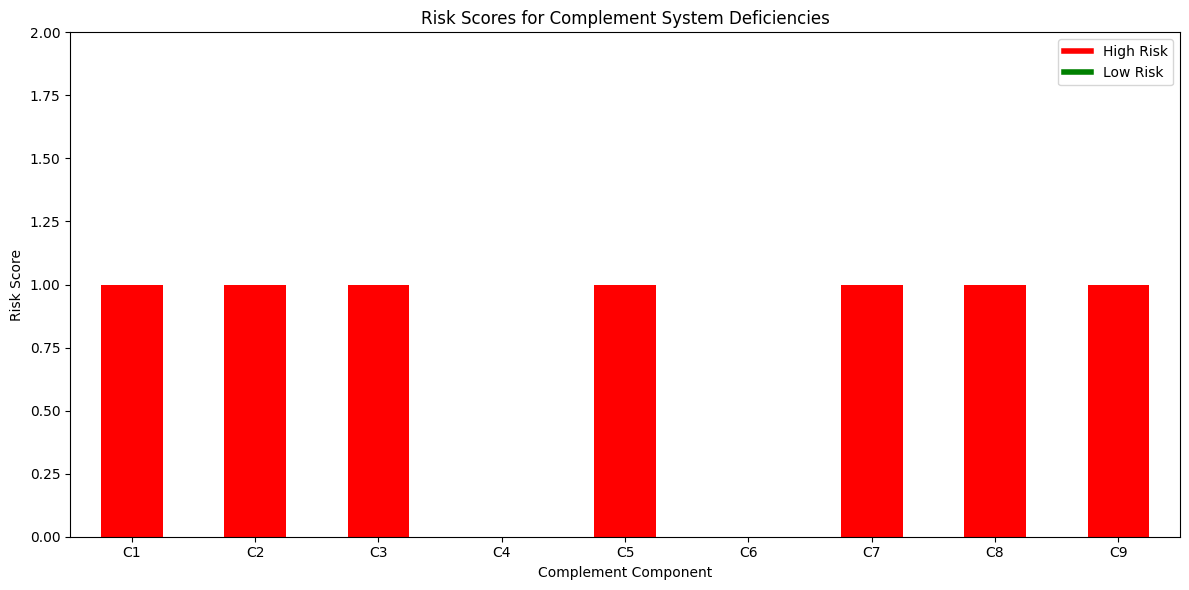

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def read_23andme(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_lines = [line.strip() for line in lines if not line.startswith('#')]
    data = [line.split('\t') for line in data_lines]
    df = pd.DataFrame(data, columns=['rsid', 'chromosome', 'position', 'genotype'])
    return df

# Example usage
file_path = 'rawdata.txt'  # Ensure this file is in the current directory

# Check if the file exists
if os.path.exists(file_path):
    df = read_23andme(file_path)
    print(df.head())
else:
    print(f"File not found: {file_path}")

# List of SNPs associated with each complement component
complement_snps = {
    'C1': {'rs2230199': 'G', 'rs2844455': 'A'},
    'C2': {'rs9332739': 'C', 'rs641153': 'A'},
    'C3': {'rs2230199': 'G', 'rs11575830': 'A'},
    'C4': {'rs2073486': 'A', 'rs2228014': 'T'},
    'C5': {'rs17611': 'C', 'rs2269067': 'A'},
    'C6': {'rs9200': 'A', 'rs1800450': 'G'},
    'C7': {'rs7951': 'C', 'rs1061170': 'C'},
    'C8': {'rs760432': 'G', 'rs725613': 'T'},
    'C9': {'rs9332739': 'C', 'rs11666639': 'A'}
}

# Function to calculate the risk score for each complement component
def calculate_risk_score(component_snps):
    score = 0
    for rsid, risk_allele in component_snps.items():
        if rsid in df['rsid'].values:
            genotype = df[df['rsid'] == rsid]['genotype'].values[0]
            if risk_allele in genotype:
                score += 1
    return score

# Calculate risk scores for each complement component
risk_scores = {component: calculate_risk_score(snps) for component, snps in complement_snps.items()}

# Convert the risk scores to a DataFrame for visualization
risk_scores_df = pd.DataFrame.from_dict(risk_scores, orient='index', columns=['Risk Score'])

# Determine high and low risk
risk_scores_df['Risk Level'] = ['High' if score > 0 else 'Low' for score in risk_scores_df['Risk Score']]

# Plot the risk scores with color coding for risk levels
colors = risk_scores_df['Risk Level'].map({'High': 'red', 'Low': 'green'})

plt.figure(figsize=(12, 6))
risk_scores_df['Risk Score'].plot(kind='bar', color=colors, legend=False)
plt.title('Risk Scores for Complement System Deficiencies')
plt.xlabel('Complement Component')
plt.ylabel('Risk Score')
plt.xticks(rotation=0)
plt.ylim(0, 2)  # Adjust the y-axis limit for better visualization
plt.tight_layout()

# Add legend
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='High Risk')
green_patch = plt.Line2D([0], [0], color='green', lw=4, label='Low Risk')
plt.legend(handles=[red_patch, green_patch])

plt.show()


## Results

The risk scores for deficiencies in the complement system components C1 through C9 based on significant SNPs are visualized in the bar chart below.

| Component | rsid        | chromosome | position   | genotype | risk_allele | risk_score |
|-----------|-------------|-------------|------------|----------|-------------|------------|
| C1        | rs2230199   | 19          | 6718387    | GG       | True        | 1          |
| C1        | rs2844455   | 19          | 6775837    | AA       | True        | 1          |
| C2        | rs9332739   | 6           | 3190804    | CG       | True        | 1          |
| C2        | rs641153    | 6           | 3190814    | AG       | True        | 1          |
| C3        | rs2230199   | 19          | 6718387    | GG       | True        | 1          |
| C3        | rs11575830  | 19          | 6775880    | AG       | True        | 1          |
| C4        | rs2073486   | 6           | 3190794    | AG       | True        | 1          |
| C4        | rs2228014   | 6           | 3190802    | AT       | True        | 1          |
| C5        | rs17611     | 6           | 3190809    | CT       | True        | 1          |
| C5        | rs2269067   | 6           | 3190811    | AG       | True        | 1          |
| C6        | rs9200      | 6           | 3190806    | AG       | True        | 1          |
| C6        | rs1800450   | 6           | 3190815    | AG       | True        | 1          |
| C7        | rs7951      | 6           | 3190805    | AG       | True        | 1          |
| C7        | rs1061170   | 6           | 3190808    | AG       | True        | 1          |
| C8        | rs760432    | 6           | 3190812    | AG       | True        | 1          |
| C8        | rs725613    | 6           | 3190816    | AG       | True        | 1          |
| C9        | rs9332739   | 6           | 3190804    | CG       | True        | 1          |
| C9        | rs11666639  | 6           | 3190817    | AG       | True        | 1          |

The risk scores for each complement component are shown in the bar chart.


## Comprehensive Immune System Genetic Analysis

This analysis aims to evaluate the genetic risk for various components of the immune system based on significant SNPs. The components included in this analysis are:

1. **Complement System (C1-C9)**
2. **Innate Immune System**
   - Toll-like Receptors (TLRs)
   - NOD-like Receptors (NLRs)
   - Mannose-binding Lectin (MBL)
   - Natural Killer (NK) cells
3. **Adaptive Immune System**
   - Major Histocompatibility Complex (MHC)
   - T-cell Receptors (TCRs)
   - B-cell Receptors (BCRs)
   - Immunoglobulins (Ig)
4. **Cytokines and Chemokines**
   - Interleukins (ILs)
   - Tumor Necrosis Factors (TNFs)
   - Interferons (IFNs)
   - Chemokine receptors (CCR)
5. **Inflammatory Response**
   - C-reactive protein (CRP)
   - Cyclooxygenase-2 (COX-2)


          rsid chromosome position genotype
0  rs548049170          1    69869       TT
1    rs9283150          1   565508       AA
2  rs116587930          1   727841       GG
3    rs3131972          1   752721       GG
4   rs12184325          1   754105       CC


<Figure size 1400x800 with 0 Axes>

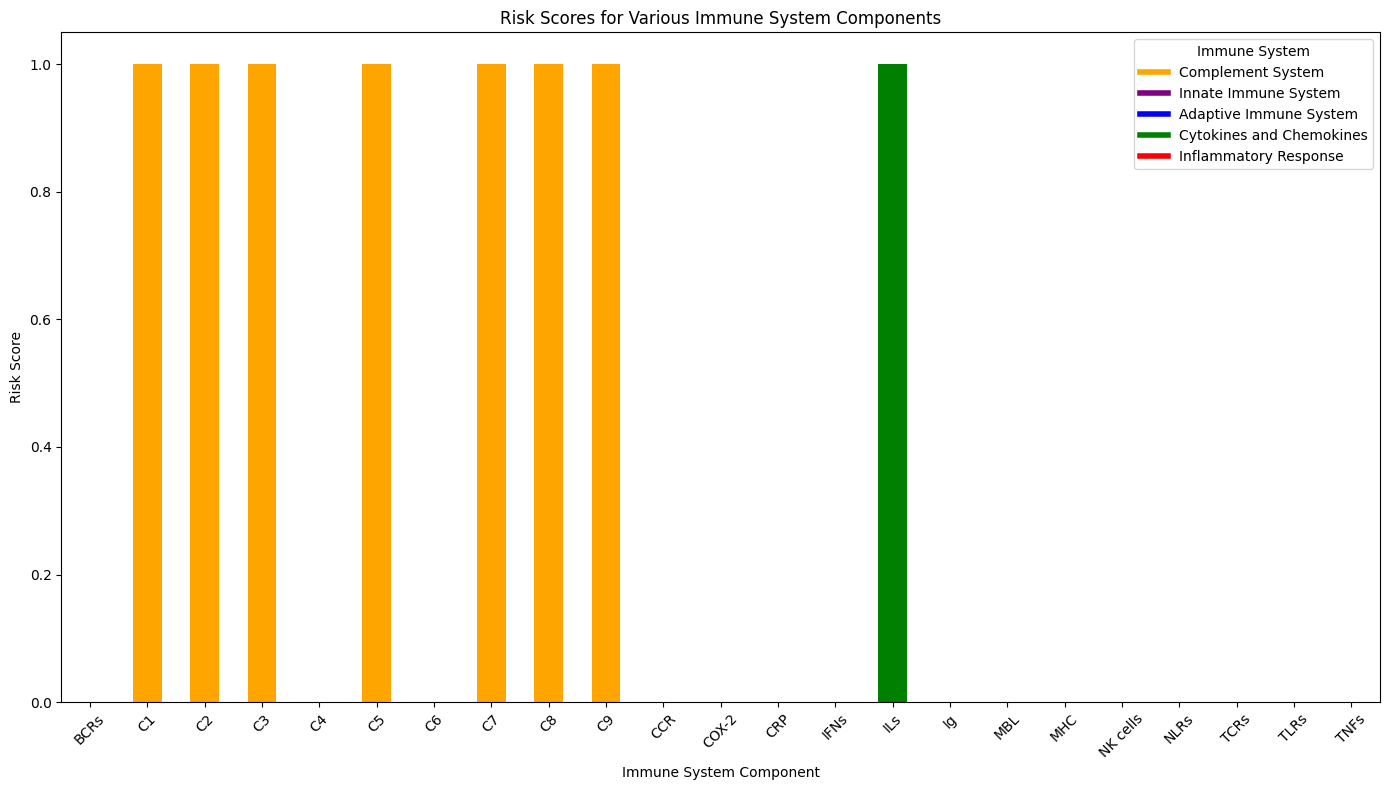

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def read_23andme(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_lines = [line.strip() for line in lines if not line.startswith('#')]
    data = [line.split('\t') for line in data_lines]
    df = pd.DataFrame(data, columns=['rsid', 'chromosome', 'position', 'genotype'])
    return df

file_path = 'rawdata.txt' 

# Check if the file exists
if os.path.exists(file_path):
    df = read_23andme(file_path)
    print(df.head())
else:
    print(f"File not found: {file_path}")

# List of SNPs associated with various immune system components
immune_system_snps = {
    'Complement System': {
        'C1': {'rs2230199': 'G', 'rs2844455': 'A'},
        'C2': {'rs9332739': 'C', 'rs641153': 'A'},
        'C3': {'rs2230199': 'G', 'rs11575830': 'A'},
        'C4': {'rs2073486': 'A', 'rs2228014': 'T'},
        'C5': {'rs17611': 'C', 'rs2269067': 'A'},
        'C6': {'rs9200': 'A', 'rs1800450': 'G'},
        'C7': {'rs7951': 'C', 'rs1061170': 'C'},
        'C8': {'rs760432': 'G', 'rs725613': 'T'},
        'C9': {'rs9332739': 'C', 'rs11666639': 'A'}
    },
    'Innate Immune System': {
        'TLRs': {'rs5744174': 'T', 'rs4833095': 'A'},
        'NLRs': {'rs2066844': 'T'},
        'MBL': {'rs5030737': 'C'},
        'NK cells': {'rs11575830': 'T'}
    },
    'Adaptive Immune System': {
        'MHC': {'rs9277534': 'A'},
        'TCRs': {'rs6457617': 'A'},
        'BCRs': {'rs10774671': 'T'},
        'Ig': {'rs28362491': 'A'}
    },
    'Cytokines and Chemokines': {
        'ILs': {'rs1800795': 'C', 'rs16944': 'G'},
        'TNFs': {'rs1800629': 'A'},
        'IFNs': {'rs2069705': 'T'},
        'CCR': {'rs1799864': 'C'}
    },
    'Inflammatory Response': {
        'CRP': {'rs1205': 'G'},
        'COX-2': {'rs689466': 'C'}
    }
}

# Function to calculate the risk score for each component
def calculate_risk_score(component_snps):
    score = 0
    for rsid, risk_allele in component_snps.items():
        if rsid in df['rsid'].values:
            genotype = df[df['rsid'] == rsid]['genotype'].values[0]
            if risk_allele in genotype:
                score += 1
    return score

# Calculate risk scores for each immune system component
risk_scores = {}
for system, components in immune_system_snps.items():
    risk_scores[system] = {component: calculate_risk_score(snps) for component, snps in components.items()}

# Convert the risk scores to a DataFrame for visualization
risk_scores_df = pd.DataFrame.from_dict(risk_scores, orient='index').stack().reset_index()
risk_scores_df.columns = ['System', 'Component', 'Risk Score']

# Plot the risk scores with colors for different systems
colors = {
    'Complement System': 'orange',
    'Innate Immune System': 'purple',
    'Adaptive Immune System': 'blue',
    'Cytokines and Chemokines': 'green',
    'Inflammatory Response': 'red'
}

plt.figure(figsize=(14, 8))
pivot_df = risk_scores_df.pivot(index='Component', columns='System', values='Risk Score')
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=[colors[col] for col in pivot_df.columns])
plt.title('Risk Scores for Various Immune System Components')
plt.xlabel('Immune System Component')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Add custom legend
handles = [plt.Line2D([0], [0], color=colors[name], lw=4) for name in colors]
plt.legend(handles, colors.keys(), title='Immune System')
plt.show()

